In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [171]:
# Kaggle 데이터 불러오기
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\tunguz\online-retail\versions\1


(541909, 8)

In [172]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [174]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [175]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

C:\Users\user\AppData\Local\Temp\ipykernel_26556\3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [176]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     541909 non-null  object        
 1   StockCode     541909 non-null  object        
 2   Description   540455 non-null  object        
 3   Quantity      541909 non-null  int64         
 4   InvoiceDate   541909 non-null  datetime64[ns]
 5   UnitPrice     541909 non-null  float64       
 6   CustomerID    406829 non-null  float64       
 7   Country       541909 non-null  object        
 8   TotalPrice    541909 non-null  float64       
 9   DayOfWeek     541909 non-null  int32         
 10  InvoiceMonth  541909 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(4)
memory usage: 41.3+ MB


In [178]:
df['DayOfWeek'].unique()
# 월요일: 0

array([2, 3, 4, 6, 0, 1], dtype=int32)

## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [179]:
# 무작위 1,000개 표본 추출
sample_size = 1000
sample = np.random.choice(df['TotalPrice'], size = sample_size)

# 표본 통계량 계산
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof = 1)

# 신뢰구간 계산
confidence_level = 0.95 

n = len(sample)
dof = n - 1

# 신뢰수준에 따른 임계값 찾기
t_value = stats.t.ppf((1 + confidence_level) / 2, df = dof)

# 표준 오차 계산
std_error = sample_std / np.sqrt(n)

# 오차 범위
margin_of_error = t_value * std_error

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print("--- 표본 데이터 분석 결과 ---")
print(f"표본 크기: {n}")
print(f"표본 평균: {sample_mean:.2f}")
print(f"표본 표준편차: {sample_std:.2f}\n")
print("--- 95% 신뢰구간 추정 결과 ---")
print(f"추정된 95% 신뢰구간: [{lower_bound:.2f}, {upper_bound:.2f}]\n")
print("--- 실제 데이터 분석 결과 ---")
print(f"실제 모평균: {df['TotalPrice'].mean()}")
print(f"실제 표준편차: {df['TotalPrice'].std()}")

--- 표본 데이터 분석 결과 ---
표본 크기: 1000
표본 평균: 15.82
표본 표준편차: 42.68

--- 95% 신뢰구간 추정 결과 ---
추정된 95% 신뢰구간: [13.17, 18.47]

--- 실제 데이터 분석 결과 ---
실제 모평균: 17.98779487699964
실제 표준편차: 378.8108235059747


- 표본과 모집단의 평균 및 표준편차 비교

표본 평균의 경우 모평균과 거의 유사하게 도출됨을 알 수 있음. 
그러나 표준편차의 경우, 모집단의 분포가 매우 크게 계산되는데, 이는 모집단에 극단적인 이상치값이 꽤 존재함을 시사함.

In [180]:
# 중심극한정리 적용
num_experiments = 10000  
sample_size = 1000
sample_means = []

for _ in range(num_experiments):
    sample = np.random.choice(df['TotalPrice'], size=sample_size)
    sample_means.append(np.mean(sample))

clt_means = np.mean(sample_means)
clt_std = np.std(sample_means, ddof=1)

# 신뢰구간 계산
confidence_level = 0.95 

clt_n = len(sample_means)
dof = clt_n - 1

# 신뢰수준에 따른 임계값 찾기
t_value = stats.t.ppf((1 + confidence_level) / 2, df = dof)

# 표준 오차 계산
std_error = clt_std / np.sqrt(clt_n)

# 오차 범위
margin_of_error = t_value * std_error

lower_bound = clt_means - margin_of_error
upper_bound = clt_means + margin_of_error

print("--- (중심극한정리 적용) 표본 데이터 분석 결과 ---")
print(f"표본 크기: {n}")
print(f"실험 횟수: {num_experiments}")
print(f"표본 평균: {clt_means:.2f}")
print(f"표본 표준편차: {clt_std:.2f}\n")
print("--- 95% 신뢰구간 추정 결과 ---")
print(f"추정된 95% 신뢰구간: [{lower_bound:.2f}, {upper_bound:.2f}]\n")
print("--- 실제 데이터 분석 결과 ---")
print(f"실제 모평균: {df['TotalPrice'].mean()}")
print(f"실제 표준편차: {df['TotalPrice'].std()}")

--- (중심극한정리 적용) 표본 데이터 분석 결과 ---
표본 크기: 1000
실험 횟수: 10000
표본 평균: 18.03
표본 표준편차: 13.04

--- 95% 신뢰구간 추정 결과 ---
추정된 95% 신뢰구간: [17.77, 18.28]

--- 실제 데이터 분석 결과 ---
실제 모평균: 17.98779487699964
실제 표준편차: 378.8108235059747


- 중심극한정리 사용 표본과 모집단의 차이

중심극한정리는 여러 번의 표본 평균을 추출하면 그 분포가 정규분포에 유사해진다는 것을 의미.
기존 데이터(모집단)이 정규분포를 구성하지 않더라도 중심극한정리를 통해 표본 평균의 분포는 정규분포를 구성할 수 있다는 점에서 차이가 있음.

## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [181]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12


In [182]:
# 주문이 가장 많은 상위 두 국가 찾기
df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending = False)

Country
United Kingdom          23494
Germany                   603
France                    461
EIRE                      360
Belgium                   119
Spain                     105
Netherlands               101
Switzerland                74
Portugal                   71
Australia                  69
Italy                      55
Finland                    48
Sweden                     46
Norway                     40
Channel Islands            33
Japan                      28
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Hong Kong                  15
Unspecified                13
Malta                      10
Singapore                  10
Israel                      9
Iceland                     7
USA                         7
Greece                      6
Canada                      6
Czech Republic              5
European Community          5
Bahrain                     4
Lithuania                   4
Un

In [183]:
# 주문 단위 total price 집계
inv_TotalPrice = df.groupby(['Country', 'InvoiceNo'])['TotalPrice'].sum().reset_index()

tp_UK = inv_TotalPrice.loc[inv_TotalPrice['Country'] == 'United Kingdom', 'TotalPrice']
tp_Ger = inv_TotalPrice.loc[inv_TotalPrice['Country'] == 'Germany', 'TotalPrice']

# 각 그룹 표본 통계량 계산
mean_UK = np.mean(tp_UK)
var_UK = np.var(tp_UK)
n_UK = len(tp_UK)

mean_Ger = np.mean(tp_Ger)
var_Ger = np.var(tp_Ger)
n_Ger = len(tp_Ger)

print(f'UK: Mean = {mean_UK:.2f}, Var = {var_UK:.2f}, n = {n_UK}')
print(f'Germany: Mean = {mean_Ger:.2f}, Var = {var_Ger:.2f}, n = {n_Ger}\n')

# Welch's t-test
x = tp_UK.values
y = tp_Ger.values

t_stat, p_val = stats.ttest_ind(x, y, equal_var = False)

print("--- Welch t-test 결과 ---")
print(f"T-statistic = {t_stat:.3f}")
print(f"P-value     = {p_val:.4g}\n")

# 이상치로 인해 분산이 너무 큼. IQR 통해 이상치 제거 후 검정 다시 진행

# 각국 IQR 계산 및 필터링
# 영국
Q1_UK = tp_UK.quantile(0.25)
Q3_UK = tp_UK.quantile(0.75)
IQR_UK = Q3_UK - Q1_UK 

tp_UK_iqr = tp_UK[(tp_UK >= Q1_UK - 1.5*IQR_UK) &
                  (tp_UK <= Q3_UK + 1.5*IQR_UK)]

# 독일
Q1_Ger = tp_Ger.quantile(0.25)
Q3_Ger = tp_Ger.quantile(0.75)
IQR_Ger = Q3_Ger - Q1_Ger

tp_Ger_iqr = tp_Ger[(tp_Ger >= Q1_Ger - 1.5*IQR_Ger) &
                    (tp_Ger <= Q3_Ger + 1.5*IQR_Ger)]

# Welch's t-test (재검정)

t_stat, p_val = stats.ttest_ind(tp_UK_iqr, tp_Ger_iqr, equal_var=False)

print("--- Welch t-test (국가별 IQR 제거 후) ---")
print(f"UK: Mean = {tp_UK_iqr.mean():.2f}, Var = {tp_UK_iqr.var():.2f}, n = {len(tp_UK_iqr)}")
print(f"Germany: Mean = {tp_Ger_iqr.mean():.2f}, Var = {tp_Ger_iqr.var():.2f}, n = {len(tp_Ger_iqr)}")
print(f"T-statistic = {t_stat:.3f}")
print(f"P-value     = {p_val:.4g}")


UK: Mean = 348.51, Var = 4184608.07, n = 23494
Germany: Mean = 367.66, Var = 338575.92, n = 603

--- Welch t-test 결과 ---
T-statistic = -0.704
P-value     = 0.4817

--- Welch t-test (국가별 IQR 제거 후) ---
UK: Mean = 215.80, Var = 51736.05, n = 21788
Germany: Mean = 295.80, Var = 104086.92, n = 578
T-statistic = -5.923
P-value     = 5.372e-09


- 결과 분석

우선 두 표본 사이 분산의 차이가 크므로 Welch의 t 검정을 진행하였음.  

이상치 제거 전에는 p > 0.05 로, 두 집단간 평균의 차이는 통계적으로 유의미하지 않았으나,  
IQR을 통한 이상치 제거 후에는 매우 작은 p값이 도출되어, 두 국가 간 TotalPrice의 차이가 통계적으로 유의미함을 알 수 있음. 

1종 오류는 유의 수준 알파와 동일한 의미인데, IQR 제거 후 p-value는 매우 작은 값으로, 1종 오류 위험은 매우 낮다고 할 수 있음.  
2종 오류의 경우, 실제로는 평균에 차이가 있으나 없다고 판단하는 오류를 의미하는데, 이는 IQR 제거 이전에서 발생했었음. 이상치 제거를 통해 잘 검출할 수 있었음. 

## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [184]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12


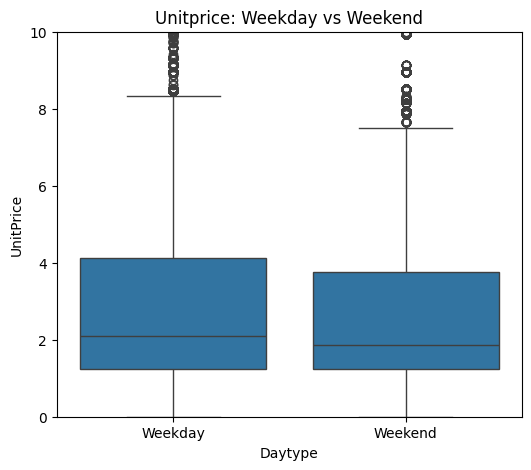

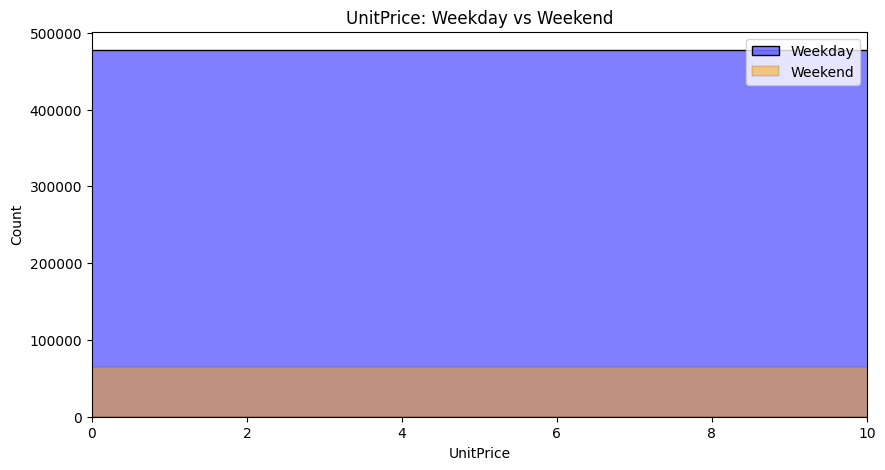

In [185]:
# 주중 주말 구분
df['Daytype'] = np.where(df['DayOfWeek'] >= 5, 'Weekend', 'Weekday')

# Unitprice
weekday_unitprice = df.loc[df['Daytype'] == 'Weekday', 'UnitPrice']
weekend_unitprice = df.loc[df['Daytype'] == 'Weekend', 'UnitPrice']

# 데이터의 통계량 계산
weekday_mean = weekday_unitprice.mean()
weekend_mean = weekend_unitprice.mean()

weekday_median = weekday_unitprice.median()
weekend_median = weekend_unitprice.median()

weekday_var = weekday_unitprice.var()
weekend_var = weekend_unitprice.var()

weekday_std = weekday_unitprice.std()
weekend_std = weekend_unitprice.std()

Q1_weekday = weekday_unitprice.quantile(0.25)
Q1_weekend = weekend_unitprice.quantile(0.25)

Q3_weekday = weekday_unitprice.quantile(0.75)
Q3_weekend = weekend_unitprice.quantile(0.75)

# 상자수염그림과 히스토그램 그리기

# 상자수염그림
plt.figure(figsize=(6,5))
sns.boxplot(x='Daytype', y='UnitPrice', data=df)
plt.ylim(0, 10)  
plt.title("Unitprice: Weekday vs Weekend")
plt.show()

# 히스토그램
plt.figure(figsize=(10,5))
sns.histplot(weekday_unitprice, bins=10, color='blue', alpha=0.5, label='Weekday')
sns.histplot(weekend_unitprice, bins=10, color='orange', alpha=0.5, label='Weekend')
plt.xlim(0, 10)  
plt.title("UnitPrice: Weekday vs Weekend")
plt.legend()
plt.show()



- 분포 설명

상자수염그림을 보면 주중, 주말 모두 Unitprice 2 근처에서 중앙값을 보여주고 있음.  
Q1, Q3를 통한 4분위 범위도 비슷하게 나타나고 있음. 즉, 주중 주말 모두 분포는 비슷해보임.  

그러나, 주중 주말 모두 큰 이상치가 눈에 띄며 특히 주중의 이상치가 큼을 알 수 있음.  

히스토그램을 보면 주중의 거래량이 주말에 비해 훨씬 많음을 알 수 있음.

## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [186]:
model_df = df[['Quantity', 'UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']].copy()

# 결측치 제거
model_df = model_df.dropna()

# Quantity 양수만 남기기
model_df = model_df[model_df['Quantity'] > 0]

# Quantity 이상치 제거 (IQR 기준)
Q1_quantity = model_df['Quantity'].quantile(0.25)
Q3_quantity = model_df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

quantity_iqr = (model_df['Quantity'] >= Q1_quantity - 1.5*IQR_quantity) & (model_df['Quantity'] <= Q3_quantity + 1.5*IQR_quantity)

# UnitPrice 이상치 제거 (IQR 기준)
Q1_UnitPrice = model_df['UnitPrice'].quantile(0.25)
Q3_UnitPrice = model_df['UnitPrice'].quantile(0.75)
IQR_UnitPrice = Q3_UnitPrice - Q1_UnitPrice

unitprice_iqr = (model_df['UnitPrice'] >= Q1_UnitPrice - 1.5*IQR_UnitPrice) & (model_df['UnitPrice'] <= Q3_UnitPrice + 1.5*IQR_UnitPrice)

# 이상치 제거된 최종 데이터프레임
model_df = model_df[quantity_iqr & unitprice_iqr]

# 범주형 변수 원-핫 인코딩 
X = pd.get_dummies(model_df[['UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']], drop_first=True)
y = model_df['Quantity']

# 숫자형으로 변환 (object -> float)
X = X.astype(float)

# OLS 회귀모델: 상수항 추가 (안 할 경우 원점 지남)
X = sm.add_constant(X)

# OLS 회귀모델 적합
model = sm.OLS(y, X).fit()

# 결과 요약 출력
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     1689.
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        18:16:10   Log-Likelihood:            -1.2471e+06
No. Observations:              437073   AIC:                         2.494e+06
Df Residuals:                  437032   BIC:                         2.495e+06
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

- 회귀 분석 결과 해석

독립변수: UnitPrice, Country, DayOfWeek, InvoiceMonth
종속변수: Quantity  

<전체적인 분석>
우선 결정계수 R**2 는 1에 가까울 수록 설명력이 좋은 모델임을 의미하는데, 현재 0.134 로 설명력이 좋지 않음.  
다만 F 통계량의 Prob이 거의 0에 가깝게 나타나는데, 이는 회귀식이 유의미함을 의미함.

<독립변수 분석>
UnitPrice: 계수가 -0.68로, UnitPrice가 증가할수록 Quantity가 감소함을 의미. 가격과 수량의 음의 상관성을 보여주며 경제학적으로 자명한 결과.  
            p value 또한 거의 0에 가깝게 계산되며 유의미함을 의미.  

DayOfWeek, InvoiceMonth: 계수가 거의 0에 가깝기 때문에 quantity와 크게 관계있지 않지만, 음의 상관성을 보여줌.  
                            이는, dayofweek가 커질수록, month가 커질수록 quantity가 줄어듬을 의미함. 
                            선형회귀 결과이기 때문에 요일, 날짜의 순환을 설명하지는 못함.

Country: 국가별로 계수가 다르게 나타나는데, 이는 더미변수의 기준으로 잡은 Australia 와의 평균적인 차이를 의미함.
            예를 들어, 체코의 경우 4.2 더 높으며, 일본의 경우 -3.8 정도 낮음.
            이를 통해 국가별 구매량을 비교해볼 수 있음.

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# 데이터 가져오기
logic_df = df.copy()

# 결측치 제거
logic_df = logic_df.dropna()

# 이상치 제거 (Quantity = 0 제거)
logic_df = logic_df[logic_df['Quantity'] != 0]

# IsReturn 피쳐 생성 (Quantity가 음수면 반품)
logic_df['IsReturn'] = (logic_df['Quantity'] < 0).astype(int)

# Quantity 절댓값 컬럼 생성
logic_df['AbsQuantity'] = logic_df['Quantity'].abs()

# 모델 학습 사용 피쳐 선정
features = ['UnitPrice', 'AbsQuantity', 'InvoiceMonth']    
X = logic_df[features]
y = logic_df['IsReturn']

# train셋과 test셋 나누기
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가: 혼동 행렬
print("혼동행렬:")
print(confusion_matrix(y_test, y_pred))

# 성능 평가: 정밀도, 재현율, F1-score
print("\n분류 리포트:")
print(classification_report(y_test, y_pred))



혼동행렬:
[[119367     10]
 [  2658     14]]

분류 리포트:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    119377
           1       0.58      0.01      0.01      2672

    accuracy                           0.98    122049
   macro avg       0.78      0.50      0.50    122049
weighted avg       0.97      0.98      0.97    122049



- 분석

독립 변수로 
 1) 단가 (가격이 비싸면 반품 가능성이 높지 않을까?), 
 2) 수량(많이 주문할 수록 일부 반품하지 않을까?), 
 3) 구매 시점 (블랙프라이데이같은 11월, 크리스마스가 있는 12월 반품이 많지 않을까?) 
사용하였음.  

모델의 성능을 평가한 혼동 행렬 결과를 보면,
반품이 아닌 것은 거의 예측 했지만 (오류 10건)
실제 반품이 발생했지만 반품이 아니라고 오분류한 건이 2,658건으로 거의 예측하지 못함.  

Precision 이 0.58로 다소 낮으며, recall 은 0.01 로 모델 성능이 매우 떨어짐. 

- 평가

데이터의 피처를 단 3가지로만 잡아 다소 부족한 감이 있음 > 피쳐의 수를 늘리는 방법 시도 가능

반품 데이터가 매우 적어 학습시키기엔 적은 감이 있음 > 반품에 가중치를 주는 방법 시도 가능




